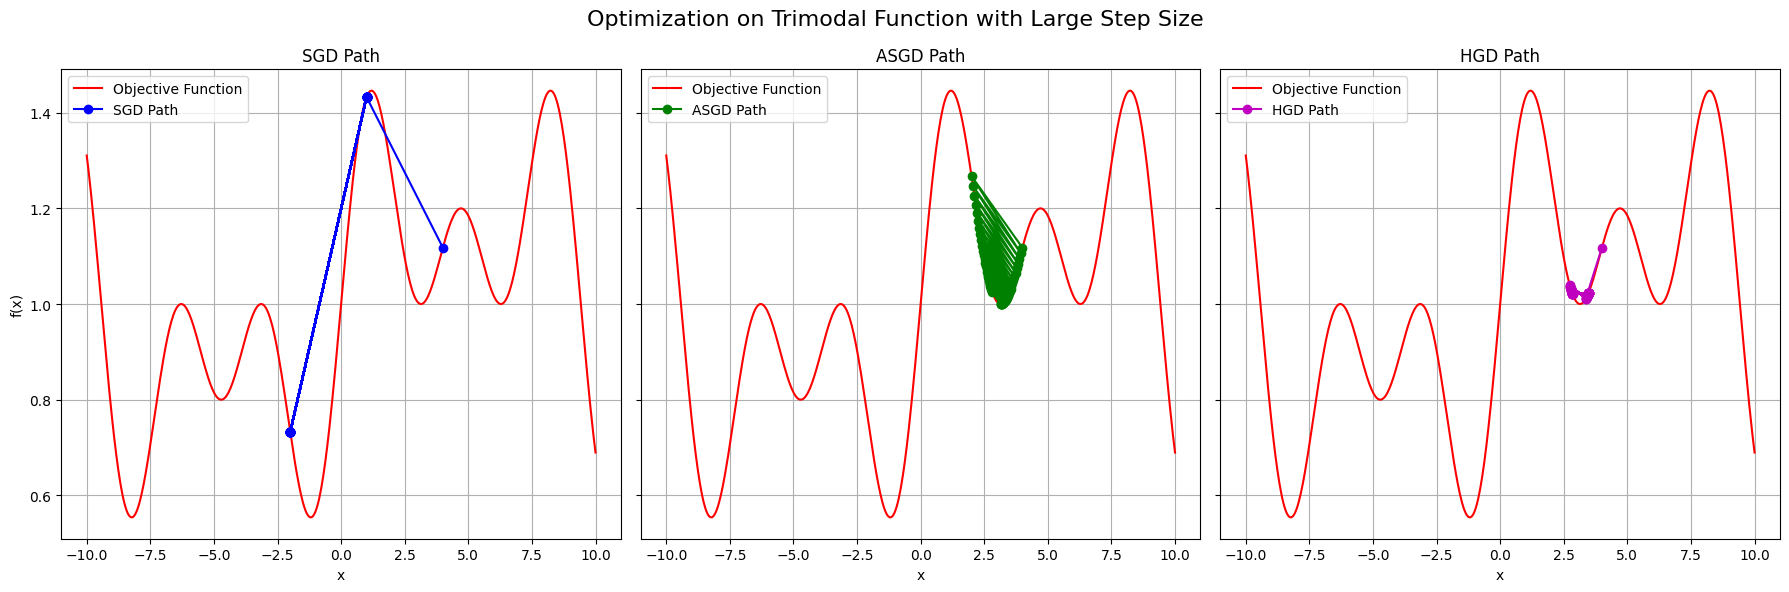

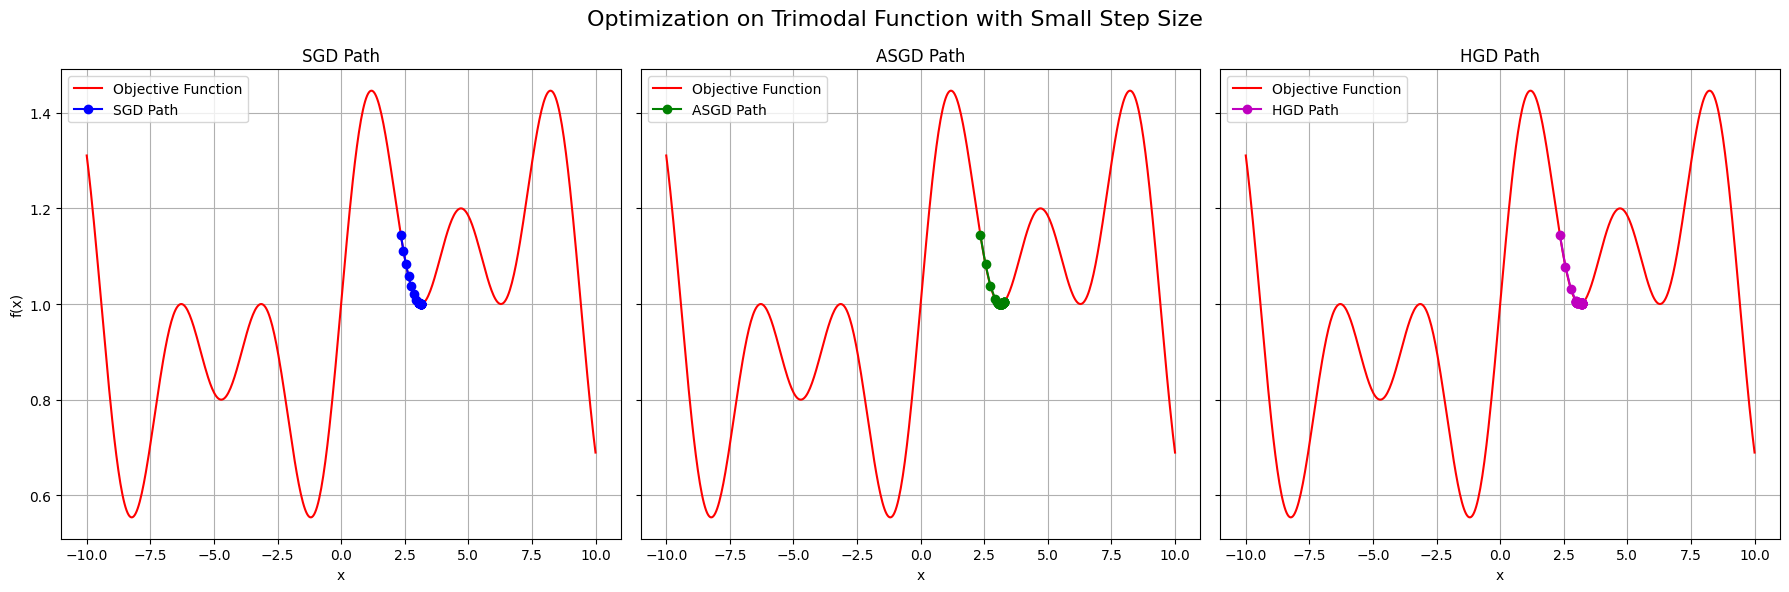

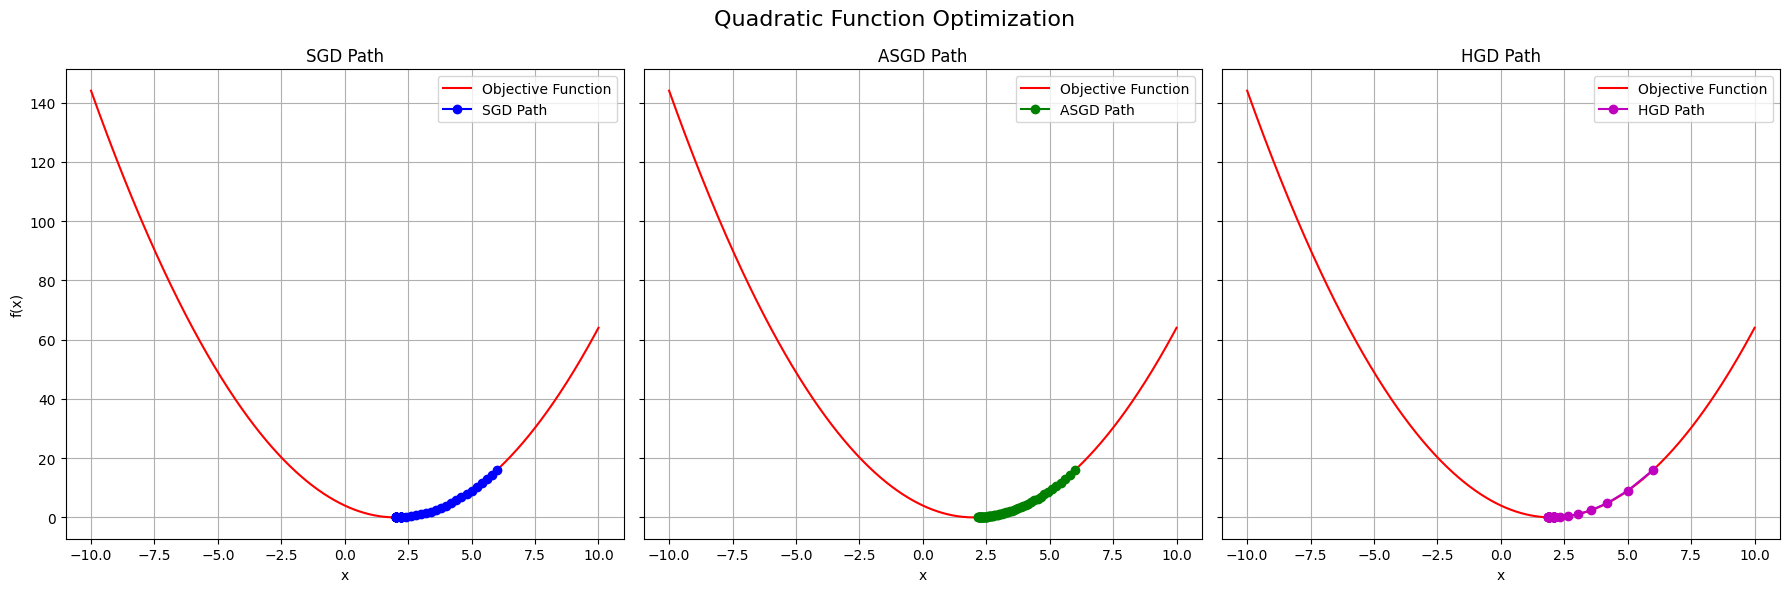

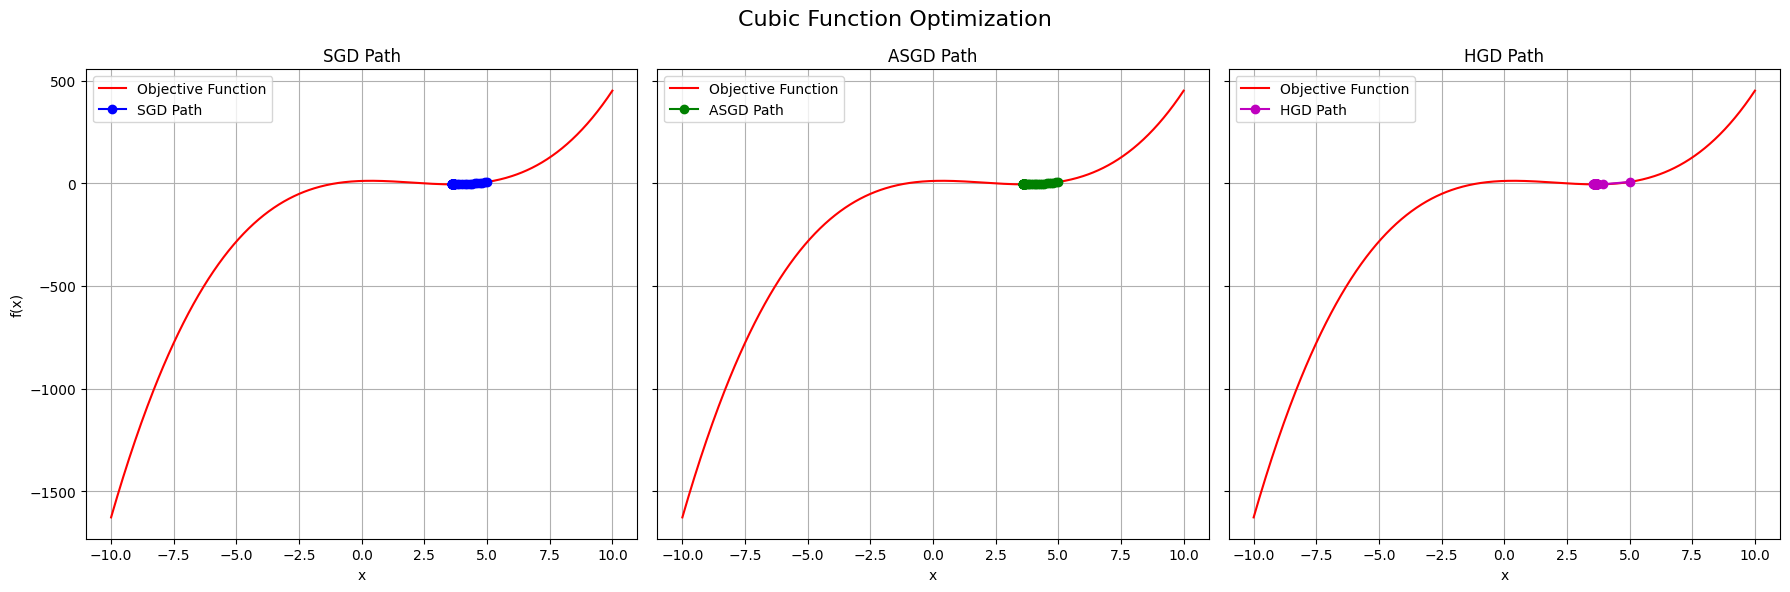

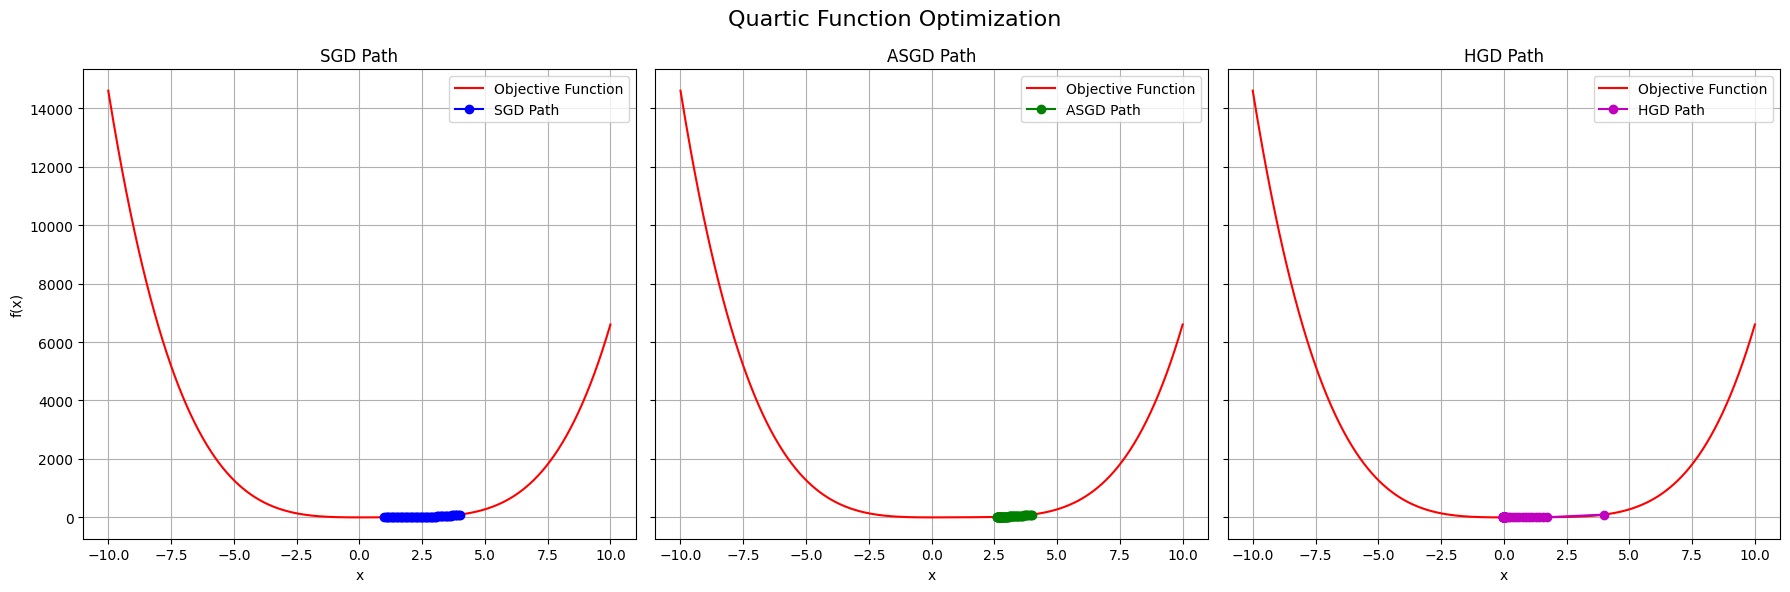

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Function Definitions
def quadratic_function(x):
    """Quadratic Function: f(x) = x^2 - 4x + 4."""
    return x**2 - 4 * x + 4

def grad_quadratic(x):
    """Gradient of the Quadratic Function."""
    return 2 * x - 4

def cubic_function(x):
    """Cubic Function: f(x) = x^3 - 6x^2 + 4x + 12."""
    return x**3 - 6 * x**2 + 4 * x + 12

def grad_cubic(x):
    """Gradient of the Cubic Function."""
    return 3 * x**2 - 12 * x + 4

def quartic_function(x):
    """Quartic Function: f(x) = x^4 - 4x^3 + 6x^2."""
    return x**4 - 4 * x**3 + 6 * x**2

def grad_quartic(x):
    """Gradient of the Quartic Function."""
    return 4 * x**3 - 12 * x**2 + 12 * x

# Trimodal Function (Three Minima, Not Symmetric)
def trimodal_function(x):
    """
    Trimodal Function: f(x) = sin(x/3)/5 + sin(3x/3)/5 + sin(5x/3)/5 + 1
    This function has three minima, with different depths and distances between them.
    The minima are not symmetric.
    """
    return np.sin(x/3)/5 + np.sin(3 * x/3)/5 + np.sin(5 * x/3)/5 + 1

def grad_trimodal(x):
    """
    Gradient of the Trimodal Function:
    f'(x) = cos(x/3)/15 + 3*cos(3x/3)/15 + 5*cos(5x/3)/15
    """
    return (np.cos(x / 3) / 15) + (3 * np.cos(3 * x / 3) / 15) + (5 * np.cos(5 * x / 3) / 15)

# Gradient Descent Methods

def sign_gradient_descent(grad_func, x_init, gamma, iterations):
    """Sign Gradient Descent (SGD)"""
    x = np.array(x_init, dtype=float)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma * np.sign(grad)
        path.append(x.copy())
    return np.array(path)

def adaptive_sign_gradient_descent(grad_func, x_init, gamma_0, decay_rate, iterations):
    """Adaptive Sign Gradient Descent (ASGD)"""
    x = np.array(x_init, dtype=float)
    gamma = gamma_0
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma * np.sign(grad)
        path.append(x.copy())
        gamma *= decay_rate  # Reduce step size
    return np.array(path)

def hybrid_gradient_descent(grad_func, x_init, gamma1, gamma2, iterations):
    """Hybrid Gradient Descent (HGD)"""
    x = np.array(x_init, dtype=float)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma1 * grad + gamma2 * np.sign(grad)
        path.append(x.copy())
    return np.array(path)

# Visualization with Subplots for Each Algorithm
def visualize_subplots(paths, function, title="Optimization Paths"):
    """Visualizes optimization paths for different algorithms."""
    x_vals = np.linspace(-10, 10, 500)
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    path_labels = ["SGD Path", "ASGD Path", "HGD Path"]
    colors = ['b', 'g', 'm']  # Different colors for each path

    for i, (path, label, color) in enumerate(zip(paths, path_labels, colors)):
        axs[i].plot(x_vals, function(x_vals), 'r-', label="Objective Function")
        axs[i].plot(path, function(path), marker='o', color=color, label=label)
        axs[i].set_title(label)
        axs[i].set_xlabel("x")
        axs[i].grid()
        axs[i].legend()

    axs[0].set_ylabel("f(x)")  # Add ylabel only to the first subplot
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Parameters
iterations = 60

# Trimodal Function Optimization with Large Step Size
x_init = 4  # Starting point between the minima
sgd_path_trimodal = sign_gradient_descent(grad_trimodal, x_init, gamma=3.0, iterations=iterations)
asgd_path_trimodal = adaptive_sign_gradient_descent(grad_trimodal, x_init, gamma_0=2.0, decay_rate=0.97, iterations=iterations)
hgd_path_trimodal = hybrid_gradient_descent(grad_trimodal, x_init, gamma1=0.1, gamma2=0.62, iterations=iterations)

# Visualize Trimodal Function with Large Step Size
visualize_subplots([sgd_path_trimodal, asgd_path_trimodal, hgd_path_trimodal], trimodal_function, title="Optimization on Trimodal Function with Large Step Size")

# Trimodal Function Optimization with Small Step Size
x_init = 2.35  # Starting point between the minima
sgd_path_trimodal = sign_gradient_descent(grad_trimodal, x_init, gamma=0.1, iterations=iterations)
asgd_path_trimodal = adaptive_sign_gradient_descent(grad_trimodal, x_init, gamma_0=0.2, decay_rate=0.97, iterations=iterations)
hgd_path_trimodal = hybrid_gradient_descent(grad_trimodal, x_init, gamma1=0.05, gamma2=0.2, iterations=iterations)

# Visualize Trimodal Function with Small Step Size
visualize_subplots([sgd_path_trimodal, asgd_path_trimodal, hgd_path_trimodal], trimodal_function, title="Optimization on Trimodal Function with Small Step Size")

# Quadratic Function Optimization
x_init = 6.0
sgd_path_quad = sign_gradient_descent(grad_quadratic, x_init, gamma=0.2, iterations=iterations)
asgd_path_quad = adaptive_sign_gradient_descent(grad_quadratic, x_init, gamma_0=0.2, decay_rate=0.95, iterations=iterations)
hgd_path_quad = hybrid_gradient_descent(grad_quadratic, x_init, gamma1=0.1, gamma2=0.2, iterations=iterations)
visualize_subplots([sgd_path_quad, asgd_path_quad, hgd_path_quad], quadratic_function, title="Quadratic Function Optimization")

# Cubic Function Optimization
x_init = 5.0
sgd_path_cubic = sign_gradient_descent(grad_cubic, x_init, gamma=0.1, iterations=iterations)
asgd_path_cubic = adaptive_sign_gradient_descent(grad_cubic, x_init, gamma_0=0.1, decay_rate=0.97, iterations=iterations)
hgd_path_cubic = hybrid_gradient_descent(grad_cubic, x_init, gamma1=0.05, gamma2=0.1, iterations=iterations)
visualize_subplots([sgd_path_cubic, asgd_path_cubic, hgd_path_cubic], cubic_function, title="Cubic Function Optimization")

# Quartic Function Optimization
x_init = 4.0
sgd_path_quartic = sign_gradient_descent(grad_quartic, x_init, gamma=0.05, iterations=iterations)
asgd_path_quartic = adaptive_sign_gradient_descent(grad_quartic, x_init, gamma_0=0.05, decay_rate=0.97, iterations=iterations)
hgd_path_quartic = hybrid_gradient_descent(grad_quartic, x_init, gamma1=0.02, gamma2=0.05, iterations=iterations)
visualize_subplots([sgd_path_quartic, asgd_path_quartic, hgd_path_quartic], quartic_function, title="Quartic Function Optimization")

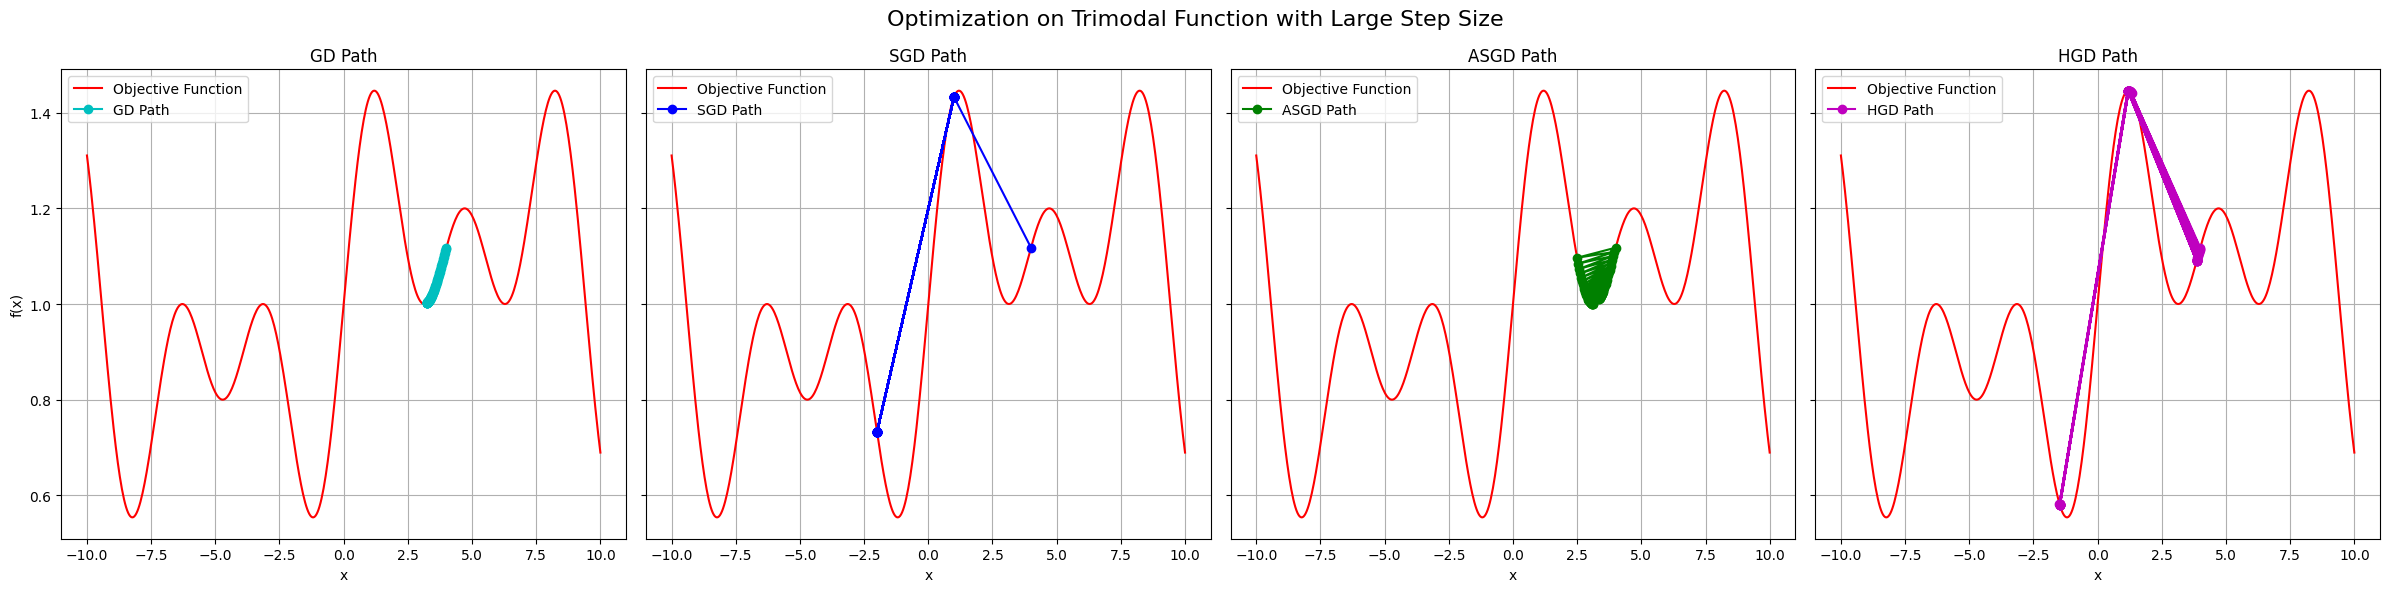

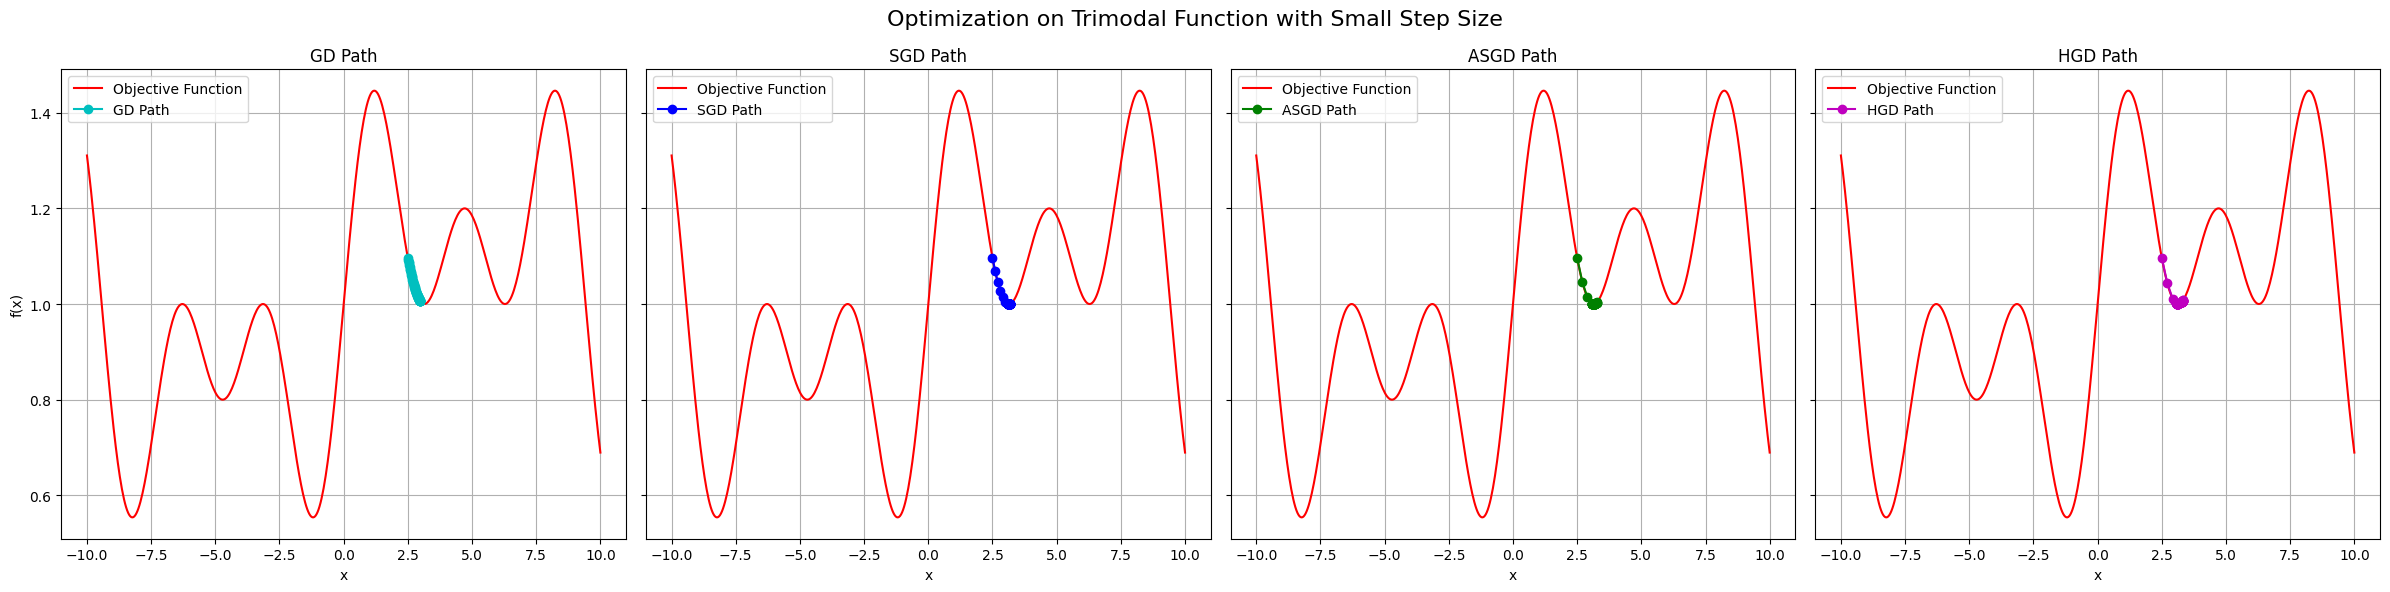

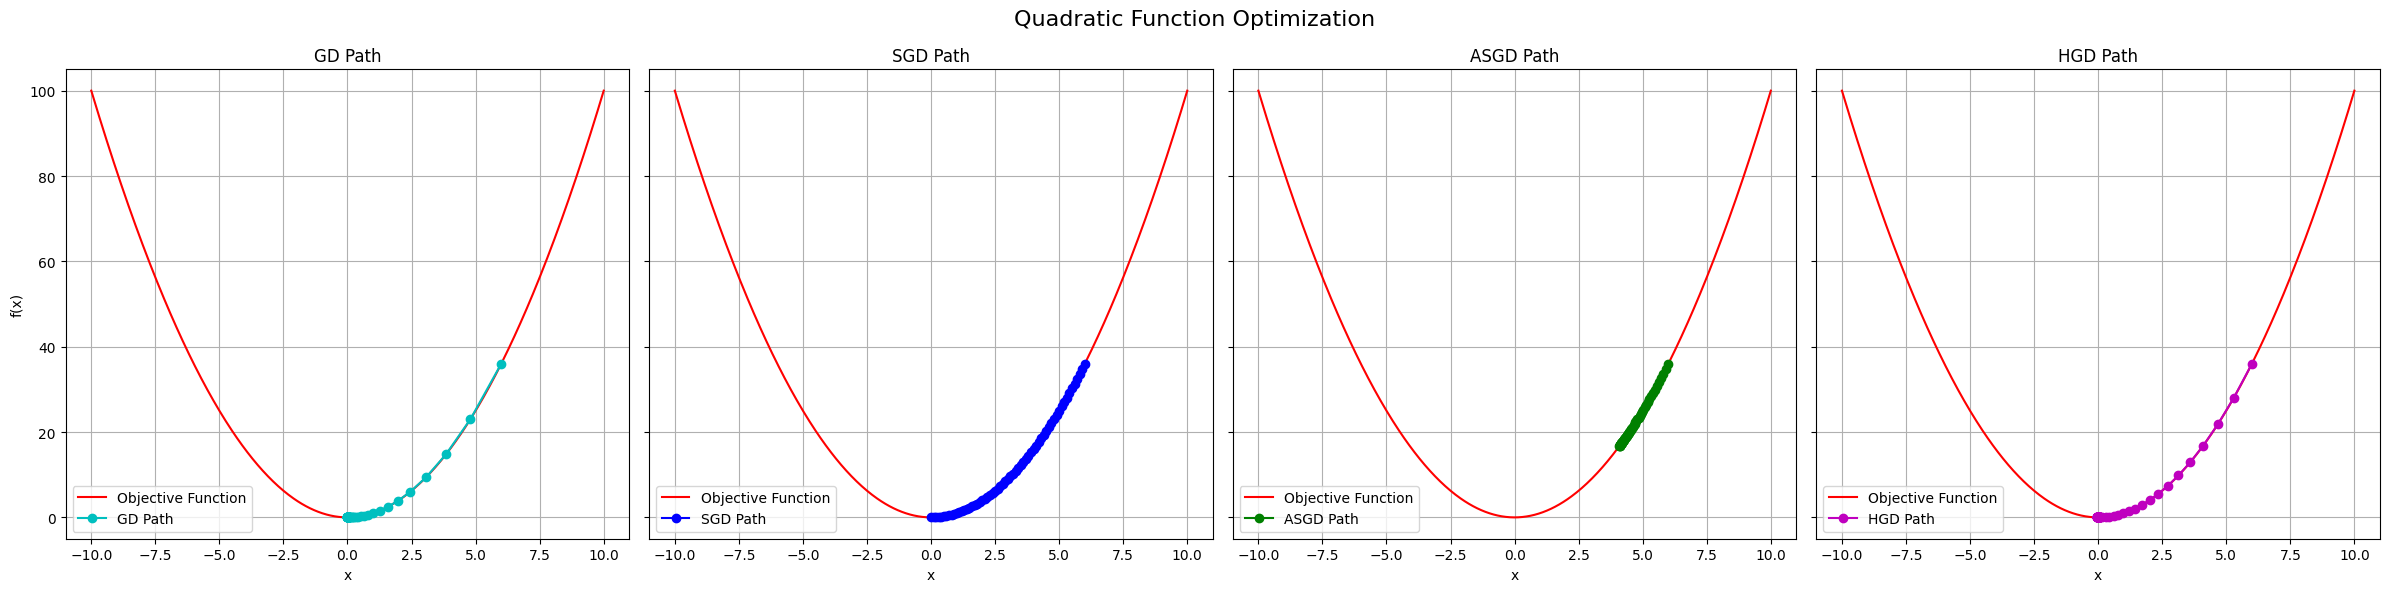

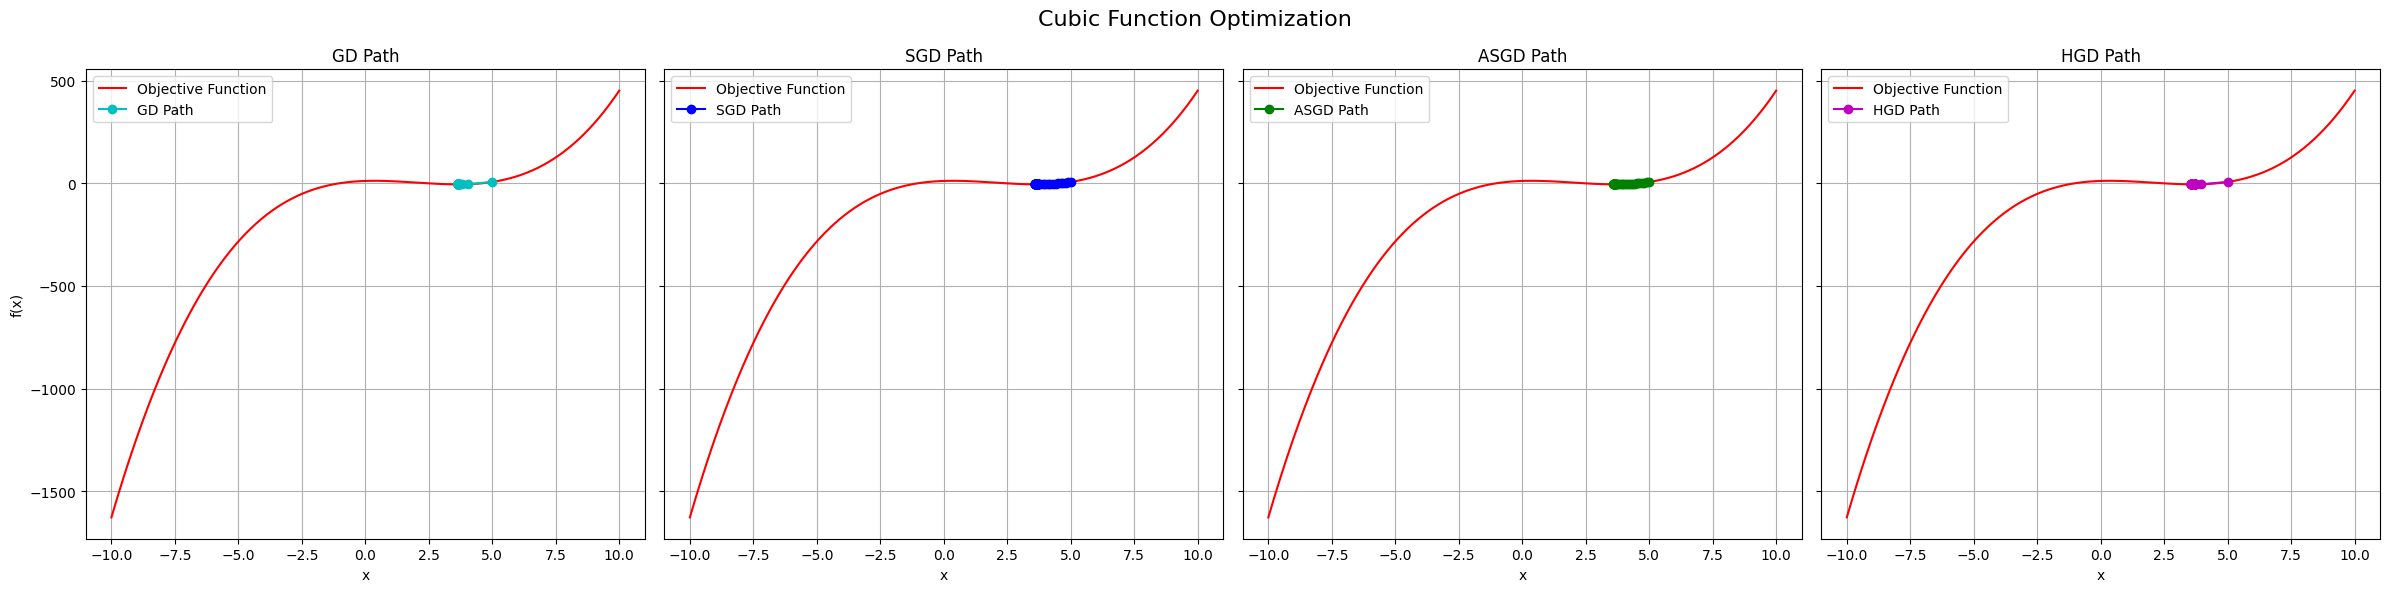

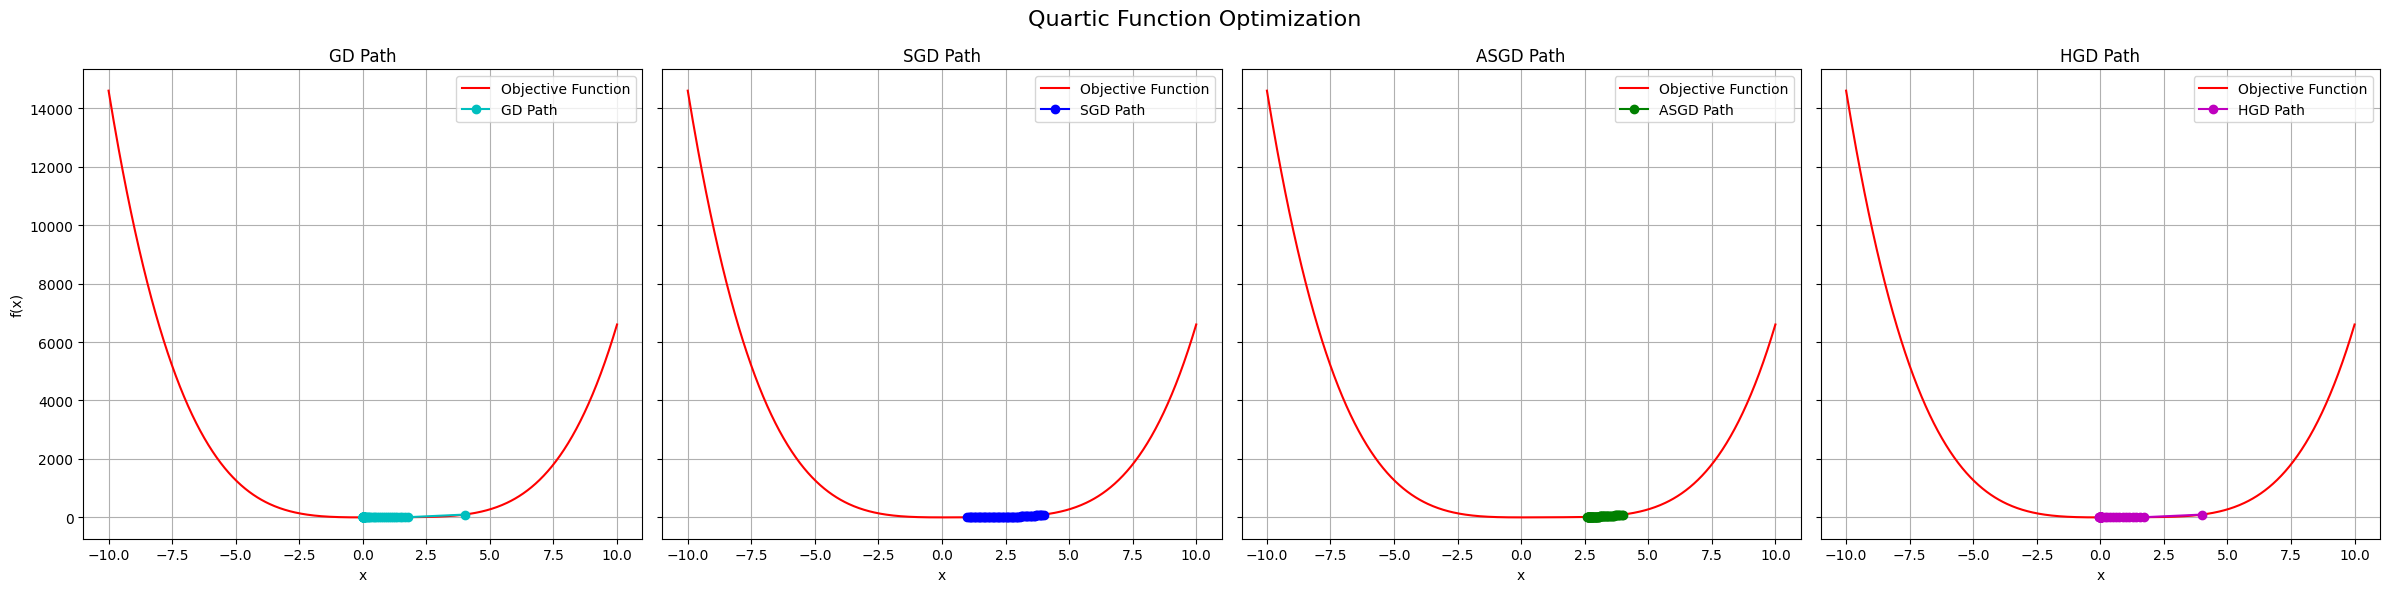

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Function Definitions
def quadratic_function(x):
    """Quadratic Function: f(x) = x^2."""
    return x**2

def grad_quadratic(x):
    """Gradient of the Quadratic Function."""
    return 2 * x

def cubic_function(x):
    """Cubic Function: f(x) = x^3 - 6x^2 + 4x + 12."""
    return x**3 - 6 * x**2 + 4 * x + 12

def grad_cubic(x):
    """Gradient of the Cubic Function."""
    return 3 * x**2 - 12 * x + 4

def quartic_function(x):
    """Quartic Function: f(x) = x^4 - 4x^3 + 6x^2."""
    return x**4 - 4 * x**3 + 6 * x**2

def grad_quartic(x):
    """Gradient of the Quartic Function."""
    return 4 * x**3 - 12 * x**2 + 12 * x

# Trimodal Function (Three Minima, Not Symmetric)
def trimodal_function(x):
    """
    Trimodal Function: f(x) = sin(x/3)/5 + sin(3x/3)/5 + sin(5x/3)/5 + 1
    """
    return np.sin(x/3)/5 + np.sin(3 * x/3)/5 + np.sin(5 * x/3)/5 + 1

def grad_trimodal(x):
    """
    Gradient of the Trimodal Function:
    f'(x) = cos(x/3)/15 + 3*cos(3x/3)/15 + 5*cos(5x/3)/15
    """
    return (np.cos(x / 3) / 15) + (3 * np.cos(3 * x / 3) / 15) + (5 * np.cos(5 * x / 3) / 15)

# Gradient Descent Methods
def gradient_descent(grad_func, x_init, gamma, iterations):
    """Standard Gradient Descent (GD)."""
    x = np.array(x_init, dtype=float)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma * grad
        path.append(x.copy())
    return np.array(path)

def sign_gradient_descent(grad_func, x_init, gamma, iterations):
    """Sign Gradient Descent (SGD)."""
    x = np.array(x_init, dtype=float)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma * np.sign(grad)
        path.append(x.copy())
    return np.array(path)

def adaptive_sign_gradient_descent(grad_func, x_init, gamma_0, decay_rate, iterations):
    """Adaptive Sign Gradient Descent (ASGD)."""
    x = np.array(x_init, dtype=float)
    gamma = gamma_0
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma * np.sign(grad)
        path.append(x.copy())
        gamma *= decay_rate  # Reduce step size
    return np.array(path)

def hybrid_gradient_descent(grad_func, x_init, gamma1, gamma2, iterations):
    """Hybrid Gradient Descent (HGD)."""
    x = np.array(x_init, dtype=float)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_func(x)
        x -= gamma1 * grad + gamma2 * np.sign(grad)
        path.append(x.copy())
    return np.array(path)

# Visualization with Subplots for Each Algorithm
def visualize_subplots(paths, function, title="Optimization Paths"):
    """Visualizes optimization paths for different algorithms."""
    x_vals = np.linspace(-10, 10, 500)
    fig, axs = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

    path_labels = ["GD Path", "SGD Path", "ASGD Path", "HGD Path"]
    colors = ['c', 'b', 'g', 'm']  # Different colors for each path

    for i, (path, label, color) in enumerate(zip(paths, path_labels, colors)):
        axs[i].plot(x_vals, function(x_vals), 'r-', label="Objective Function")
        axs[i].plot(path, function(path), marker='o', color=color, label=label)
        axs[i].set_title(label)
        axs[i].set_xlabel("x")
        axs[i].grid()
        axs[i].legend()

    axs[0].set_ylabel("f(x)")  # Add ylabel only to the first subplot
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Parameters
iterations = 60

# Trimodal Function Optimization with Large Step Size
x_init = 4  # Starting point between the minima
sgd_path_trimodal = sign_gradient_descent(grad_trimodal, x_init, gamma=3.0, iterations=iterations)
asgd_path_trimodal = adaptive_sign_gradient_descent(grad_trimodal, x_init, gamma_0=1.5, decay_rate=0.97, iterations=iterations)
hgd_path_trimodal = hybrid_gradient_descent(grad_trimodal, x_init, gamma1=0.1, gamma2=2.66, iterations=iterations)
gd_path_trimodal = gradient_descent(grad_trimodal, x_init, gamma=0.1, iterations=iterations)

# Visualize Trimodal Function with Large Step Size
visualize_subplots([gd_path_trimodal, sgd_path_trimodal, asgd_path_trimodal, hgd_path_trimodal], trimodal_function, title="Optimization on Trimodal Function with Large Step Size")

# Trimodal Function Optimization with Small Step Size
x_init = 2.5  # Starting point between the minima
sgd_path_trimodal = sign_gradient_descent(grad_trimodal, x_init, gamma=0.1, iterations=iterations)
asgd_path_trimodal = adaptive_sign_gradient_descent(grad_trimodal, x_init, gamma_0=0.2, decay_rate=0.97, iterations=iterations)
hgd_path_trimodal = hybrid_gradient_descent(grad_trimodal, x_init, gamma1=0.05, gamma2=0.2, iterations=iterations)
gd_path_trimodal = gradient_descent(grad_trimodal, x_init, gamma=0.05, iterations=iterations)

# Visualize Trimodal Function with Small Step Size
visualize_subplots([gd_path_trimodal, sgd_path_trimodal, asgd_path_trimodal, hgd_path_trimodal], trimodal_function, title="Optimization on Trimodal Function with Small Step Size")

# Quadratic Function Optimization
x_init = 6.0
gd_path_quad = gradient_descent(grad_quadratic, x_init, gamma=0.1, iterations=iterations)
sgd_path_quad = sign_gradient_descent(grad_quadratic, x_init, gamma=0.1, iterations=iterations)
asgd_path_quad = adaptive_sign_gradient_descent(grad_quadratic, x_init, gamma_0=0.1, decay_rate=0.95, iterations=iterations)
hgd_path_quad = hybrid_gradient_descent(grad_quadratic, x_init, gamma1=0.05, gamma2=0.1, iterations=iterations)
visualize_subplots([gd_path_quad, sgd_path_quad, asgd_path_quad, hgd_path_quad], quadratic_function, title="Quadratic Function Optimization")

# Cubic Function Optimization
x_init = 5.0
sgd_path_cubic = sign_gradient_descent(grad_cubic, x_init, gamma=0.1, iterations=iterations)
asgd_path_cubic = adaptive_sign_gradient_descent(grad_cubic, x_init, gamma_0=0.1, decay_rate=0.97, iterations=iterations)
hgd_path_cubic = hybrid_gradient_descent(grad_cubic, x_init, gamma1=0.05, gamma2=0.1, iterations=iterations)
gd_path_cubic = gradient_descent(grad_cubic, x_init, gamma=0.05, iterations=iterations)
visualize_subplots([gd_path_cubic, sgd_path_cubic, asgd_path_cubic, hgd_path_cubic], cubic_function, title="Cubic Function Optimization")

# Quartic Function Optimization
x_init = 4.0
sgd_path_quartic = sign_gradient_descent(grad_quartic, x_init, gamma=0.05, iterations=iterations)
asgd_path_quartic = adaptive_sign_gradient_descent(grad_quartic, x_init, gamma_0=0.05, decay_rate=0.97, iterations=iterations)
hgd_path_quartic = hybrid_gradient_descent(grad_quartic, x_init, gamma1=0.02, gamma2=0.05, iterations=iterations)
gd_path_quartic = gradient_descent(grad_quartic, x_init, gamma=0.02, iterations=iterations)
visualize_subplots([gd_path_quartic, sgd_path_quartic, asgd_path_quartic, hgd_path_quartic], quartic_function, title="Quartic Function Optimization")


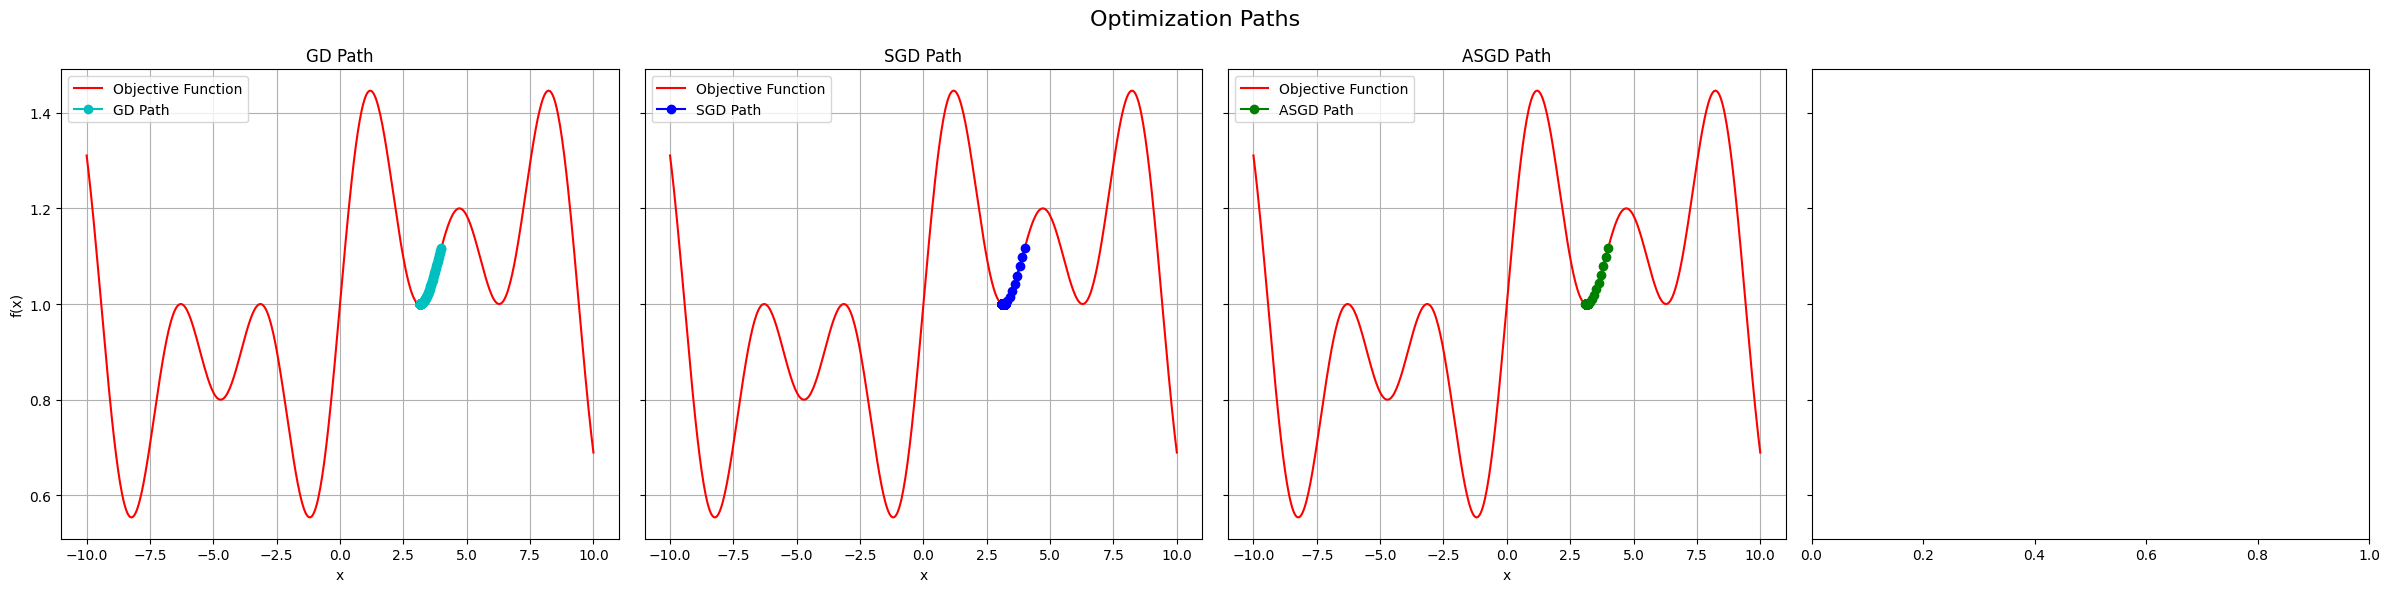

  Method  Iterations to Convergence  Convergence Time (seconds)
0     GD                         91                    0.296516
1    SGD                      10001                    0.194233
2   ASGD                         91                    0.121450


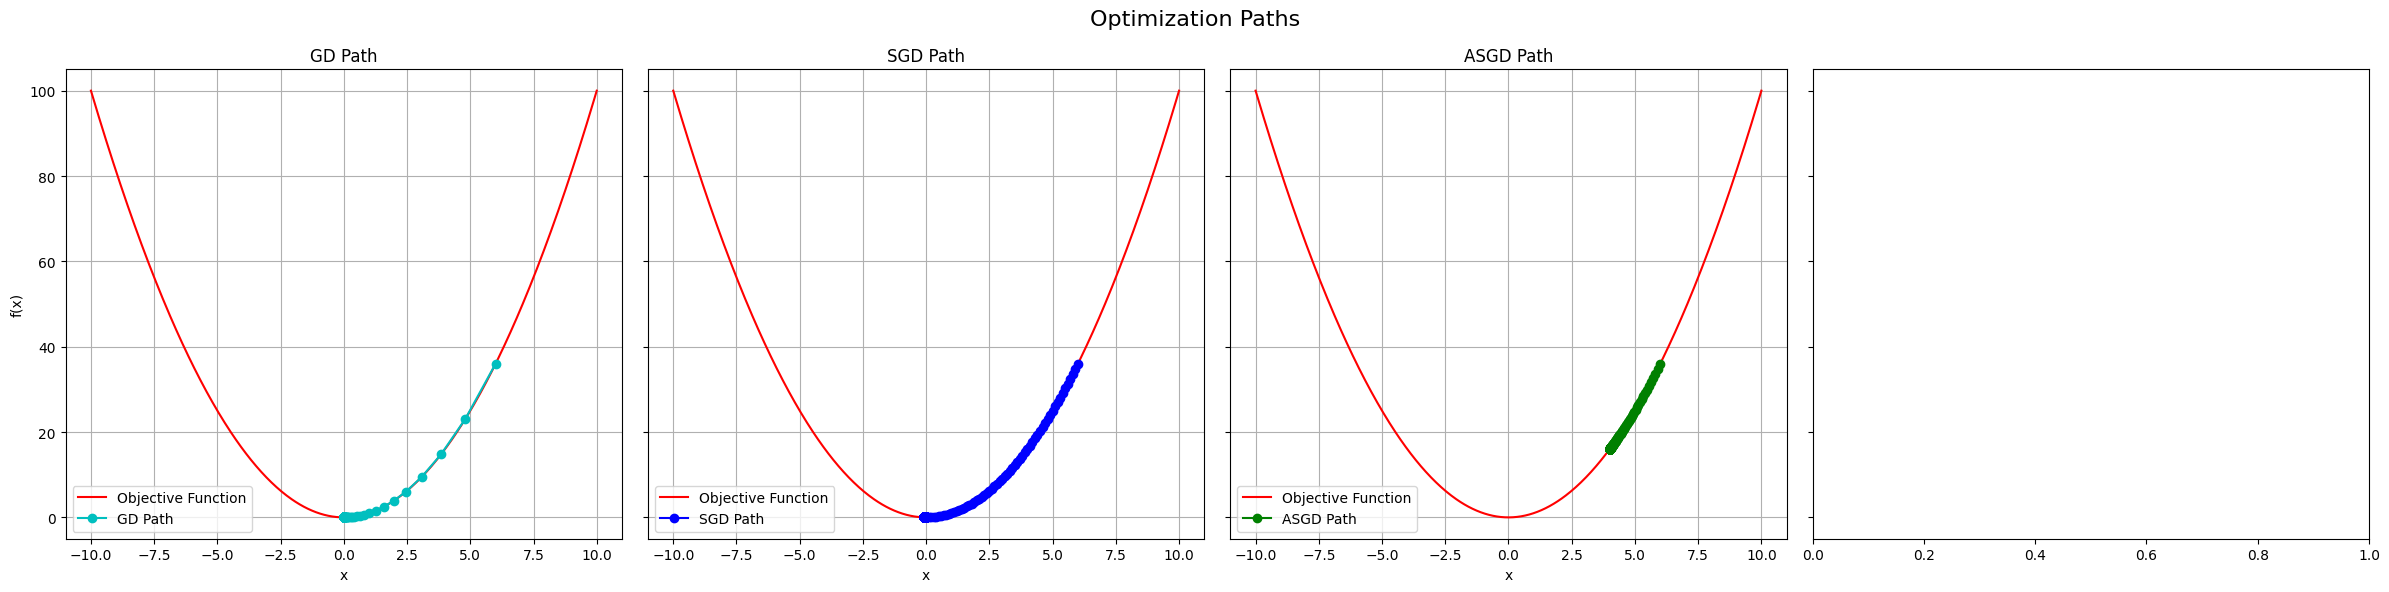

  Method  Iterations to Convergence  Convergence Time (seconds)
0     GD                         33                    0.063622
1    SGD                      10001                    0.046841
2   ASGD                        222                    0.046746


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Function to run an optimization algorithm and measure time and iterations
def run_optimization(grad_func, func, x_init, gamma, method, decay_rate=None, gamma_0=None):
    start_time = time.time()

    if method == 'GD':
        path = gradient_descent(grad_func, x_init, gamma, 10000)  # Run for a large number of iterations
    elif method == 'SGD':
        path = sign_gradient_descent(grad_func, x_init, gamma, 10000)
    elif method == 'ASGD':
        path = adaptive_sign_gradient_descent(grad_func, x_init, gamma_0, decay_rate, 10000)

    end_time = time.time()
    duration = end_time - start_time

    # Track convergence based on the change in function value between iterations
    convergence_threshold = 1e-5  # Define a small threshold for convergence
    converged = False
    for i in range(1, len(path)):
        if np.abs(func(path[i]) - func(path[i-1])) < convergence_threshold:
            converged = True
            iterations_to_converge = i
            break
    if not converged:
        iterations_to_converge = len(path)  # If not converged, consider total iterations

    return path, iterations_to_converge, duration

# Generate and visualize the optimization paths for GD, SGD, and ASGD
def visualize_and_compare(function, grad_function, x_init, gamma, gamma_0=None, decay_rate=None):
    methods = ['GD', 'SGD', 'ASGD']
    paths = []
    iteration_counts = []
    durations = []

    for method in methods:
        path, iterations_to_converge, duration = run_optimization(
            grad_function, function, x_init, gamma, method, decay_rate=decay_rate, gamma_0=gamma_0
        )
        paths.append(path)
        iteration_counts.append(iterations_to_converge)
        durations.append(duration)

    # Visualize the convergence paths
    visualize_subplots(paths, function)

    # Create a table for comparison
    results = pd.DataFrame({
        'Method': methods,
        'Iterations to Convergence': iteration_counts,
        'Convergence Time (seconds)': durations
    })

    print(results)

# Parameters
iterations = 60

# Example for Trimodal Function Optimization with GD, SGD, and ASGD
x_init_trimodal = 4  # Starting point for Trimodal Function
gamma_trimodal = 0.1
gamma_0_trimodal = 0.1
decay_rate_trimodal = 0.97

visualize_and_compare(trimodal_function, grad_trimodal, x_init_trimodal, gamma_trimodal, gamma_0=gamma_0_trimodal, decay_rate=decay_rate_trimodal)

# Example for Quadratic Function Optimization with GD, SGD, and ASGD
x_init_quad = 6.0
gamma_quad = 0.1
gamma_0_quad = 0.1
decay_rate_quad = 0.95

visualize_and_compare(quadratic_function, grad_quadratic, x_init_quad, gamma_quad, gamma_0=gamma_0_quad, decay_rate=decay_rate_quad)
